# AP2

## Forest Fires (2007), do UCI ML Repository

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('forestfires.csv')
df.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,log(area+1),nonzero(area)
0,7.0,5.0,mar,fri,86.2,26.2,94.3,5.1,8.2,51.0,6.7,0.0,0.0,0.0,False
1,7.0,4.0,oct,tue,90.6,35.4,669.1,6.7,18.0,33.0,0.9,0.0,0.0,0.0,False
2,7.0,4.0,oct,sat,90.6,43.7,686.9,6.7,14.6,33.0,1.3,0.0,0.0,0.0,False
3,8.0,6.0,mar,fri,91.7,33.3,77.5,9.0,8.3,97.0,4.0,0.2,0.0,0.0,False
4,8.0,6.0,mar,sun,89.3,51.3,102.2,9.6,11.4,99.0,1.8,0.0,0.0,0.0,False


## Questão 1) Transforme as variáveis categóricas em atributos numéricos, mantendo uma possível ordem entre seus valores. Remova as colunas log(area+1) e nonzero(area).


##### Removendo colunas

In [3]:
df = df.drop(columns=['log(area+1)', 'nonzero(area)'])

In [4]:
df.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7.0,5.0,mar,fri,86.2,26.2,94.3,5.1,8.2,51.0,6.7,0.0,0.0
1,7.0,4.0,oct,tue,90.6,35.4,669.1,6.7,18.0,33.0,0.9,0.0,0.0
2,7.0,4.0,oct,sat,90.6,43.7,686.9,6.7,14.6,33.0,1.3,0.0,0.0
3,8.0,6.0,mar,fri,91.7,33.3,77.5,9.0,8.3,97.0,4.0,0.2,0.0
4,8.0,6.0,mar,sun,89.3,51.3,102.2,9.6,11.4,99.0,1.8,0.0,0.0


##### Transformando valores categóricos em numéricos

In [5]:
months = df['month'].unique()
days = df['day'].unique()
print("Months: {}".format(months))
print('days: {}'.format(days))

Months: ['mar' 'oct' 'aug' 'sep' 'apr' 'jun' 'jul' 'feb' 'jan' 'dec' 'may' 'nov']
days: ['fri' 'tue' 'sat' 'sun' 'mon' 'wed' 'thu']


In [6]:
df = df.replace({'month': { 'jan': 1, 'feb': 2, 'mar': 3, 'apr': 4, 'may': 5, 'jun': 6, 'jul': 7, 'aug': 8, 'sep': 9, 'oct': 10, 'nov': 11, 'dec': 12 }, 'day': { 'sun': 1, 'mon': 2, 'tue': 3, 'wed': 4, 'thu': 5, 'fri': 6, 'sat': 7 }})
df.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7.0,5.0,3,6,86.2,26.2,94.3,5.1,8.2,51.0,6.7,0.0,0.0
1,7.0,4.0,10,3,90.6,35.4,669.1,6.7,18.0,33.0,0.9,0.0,0.0
2,7.0,4.0,10,7,90.6,43.7,686.9,6.7,14.6,33.0,1.3,0.0,0.0
3,8.0,6.0,3,6,91.7,33.3,77.5,9.0,8.3,97.0,4.0,0.2,0.0
4,8.0,6.0,3,1,89.3,51.3,102.2,9.6,11.4,99.0,1.8,0.0,0.0


## a) Apresente os gráficos de dispersão (scatter plot) dos atributos em função da variável alvo (área queimada). O que pode ser dito a partir desses gráficos?

In [7]:
import matplotlib.pyplot as plt 

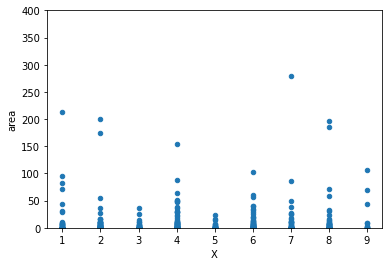

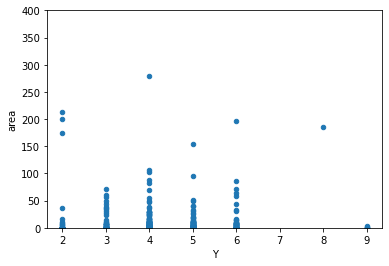

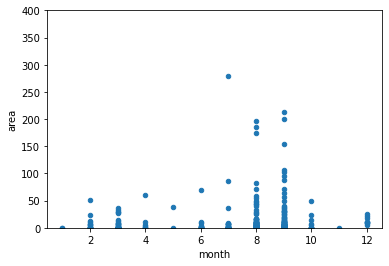

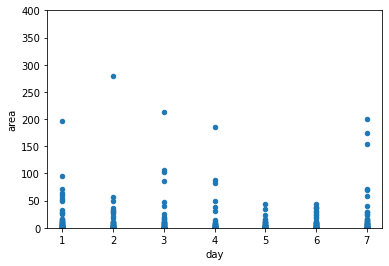

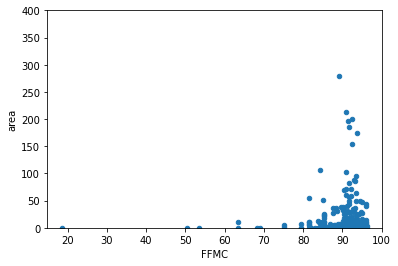

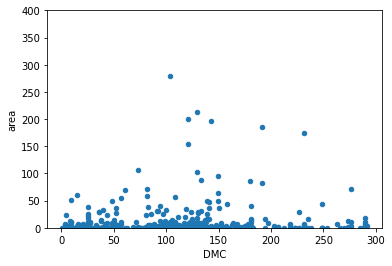

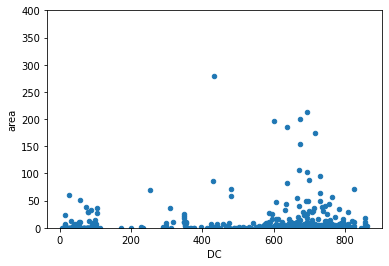

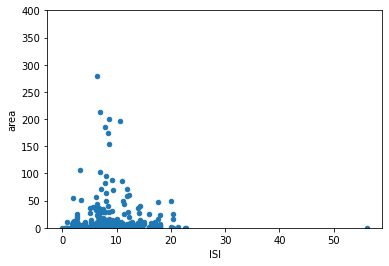

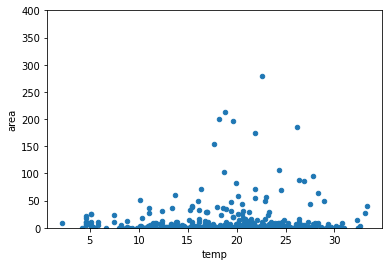

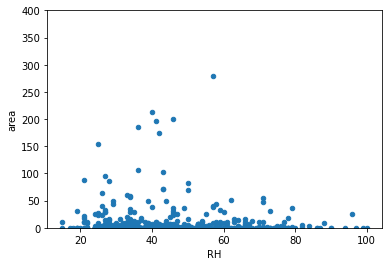

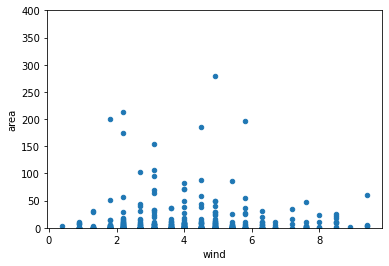

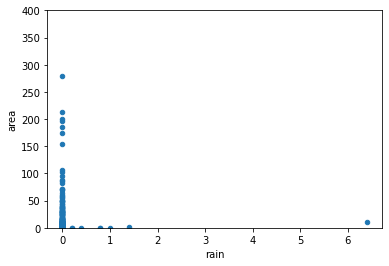

In [14]:
for label in df.columns.drop('area').values:
    df.plot.scatter(x=label, y='area', subplots=True, ylim=(0,400)) #Limitei ao 400 por que haviam alguns outliers que dificultavam a visualização

* Os meses entre julho e setembro apresentam uma maior area de incendio
* quinta e sexta a area aparenta ser menor
* o FFMC aparenta um pouco de correlação exponencial com o tamanho da area do incendio
* o DC possui também um pouco de correlação proporcional com o tamanho da area do incendio
* O ISI entre 5 e 15 aparenta causar uma maior area de incendio 
* a temperatura tambem aparenta aumentar a area do incendio nas temperaturas entre 18 e 28
* O RH aparenta ter uma correlação inversamente proporcional ao tamanho da area 
* O vento entre 2 e 6 aparenta aumentar a area de incendio mais do que os outros valores de força do vento
* A presença de chuva reduz drasticamente a area de incendio



## Questão 3) Defina uma rede Multi Layer Perceptron usando o Keras para resolver o problema.

In [18]:
from keras.models import Sequential
from keras.layers import Dense

### a) Explique a arquitetura da rede criada.

A arquitetura da rede neural para o processamento é sequencial, composta das seguintes camadas: 
* Uma camada de entrada com 16 neuronios;
* Uma camada oculta com 32 neuronios e função de ativação sigmoid;
* Uma camada oculta com 32 neuronios e função de ativação relu;
* Uma camada de saida com 1 neuronio;

### b) Compile seu modelo utilizando o algoritmo ‘adam’ para otimizar o modelo, a média do erro quadrático como função de perda. Inclua também a média do erro absoluto como métrica a ser avaliada durante o treino

In [247]:
def build_model(): 
    model = Sequential() #Modelo vazio
    model.add(Dense(units = 128, input_shape=(df.shape[1] - 1,))) #Camada de entrada
    model.add(Dense(128, activation='relu')) #Camada oculta
    # model.add(Dense(32, activation='relu')) #Camada oculta
    model.add(Dense(1)) #Camada de Saída
    model.compile(optimizer='adam', loss='mse', metrics=['mae'])
    
    return model

### c) Treine o modelo considerando 70% de dados para treino, 10% para validação e 20% para teste.

In [259]:
from sklearn.model_selection import train_test_split 

X = df[df.columns.drop('area')]
y = df['area']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

In [260]:
model = build_model()
history = model.fit(X_train, y_train, epochs=100, batch_size=1, validation_split=0.1)

Epoch 1/100
371/371 [==============================] - 1s 2ms/step - loss: 6875.4717 - mae: 31.5492 - val_loss: 1341.2985 - val_mae: 29.8998
Epoch 2/100
371/371 [==============================] - 1s 1ms/step - loss: 6230.4980 - mae: 28.1255 - val_loss: 1076.7162 - val_mae: 14.9210
Epoch 3/100
371/371 [==============================] - 0s 1ms/step - loss: 6127.8706 - mae: 27.1564 - val_loss: 1519.1643 - val_mae: 22.2992
Epoch 4/100
371/371 [==============================] - 1s 2ms/step - loss: 5917.0396 - mae: 23.8797 - val_loss: 1059.3322 - val_mae: 14.1544
Epoch 5/100
371/371 [==============================] - 1s 2ms/step - loss: 5549.5713 - mae: 20.6726 - val_loss: 1287.3978 - val_mae: 28.2968
Epoch 6/100
371/371 [==============================] - 0s 1ms/step - loss: 5724.9692 - mae: 24.4489 - val_loss: 1225.6620 - val_mae: 15.7670
Epoch 7/100
371/371 [==============================] - 0s 1ms/step - loss: 5543.2954 - mae: 22.3482 - val_loss: 1420.5903 - val_mae: 26.8307
Epoch 8/100
3

Epoch 59/100
371/371 [==============================] - 0s 1ms/step - loss: 5232.8657 - mae: 20.1827 - val_loss: 1044.2086 - val_mae: 13.7495
Epoch 60/100
371/371 [==============================] - 1s 1ms/step - loss: 5324.3008 - mae: 21.2721 - val_loss: 1103.1545 - val_mae: 25.1102
Epoch 61/100
371/371 [==============================] - 0s 1ms/step - loss: 5293.7539 - mae: 21.2063 - val_loss: 918.4586 - val_mae: 19.5673
Epoch 62/100
371/371 [==============================] - 0s 1ms/step - loss: 5263.7769 - mae: 21.8022 - val_loss: 1029.9099 - val_mae: 16.6712
Epoch 63/100
371/371 [==============================] - 1s 1ms/step - loss: 5296.5483 - mae: 19.4405 - val_loss: 925.3456 - val_mae: 19.7444
Epoch 64/100
371/371 [==============================] - 1s 1ms/step - loss: 5264.5669 - mae: 19.9583 - val_loss: 921.8960 - val_mae: 19.7766
Epoch 65/100
371/371 [==============================] - 1s 2ms/step - loss: 5171.4604 - mae: 21.5913 - val_loss: 967.9298 - val_mae: 15.7631
Epoch 66/1

## d) Apresente os gráficos com os valores da loss e métrica utilizadas em cada época de treino para o conjunto de validação e teste. Qual época obteve melhor desempenho nos dados de validação? Re-treine o seu modelo com os dados de treino+validação, considerando a melhor época como número total de épocas.

In [261]:
val_mae = history.history['val_mae']
train_mae = history.history['mae']
val_loss = history.history['val_loss']
train_loss = history.history['loss']

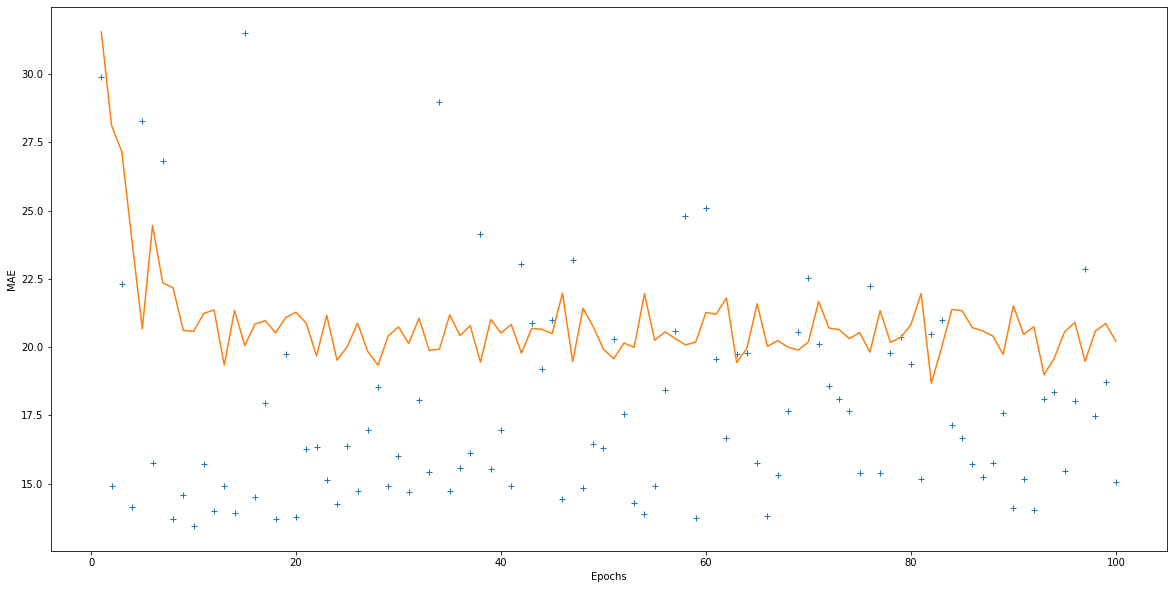

In [262]:
import matplotlib.pyplot as plt
%matplotlib inline  
plt.subplots(figsize=(20,10))
plt.plot(range(1, len(val_mae) + 1), val_mae, '+')
plt.plot(range(1, len(train_mae) + 1), train_mae)
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.show()

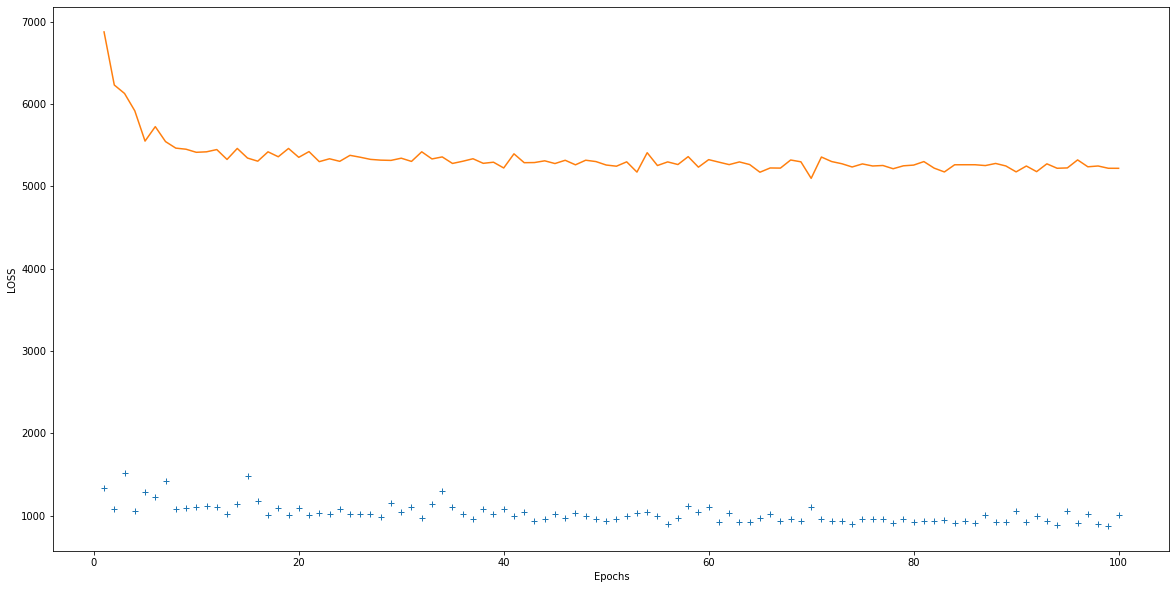

In [263]:
import matplotlib.pyplot as plt
%matplotlib inline  
plt.subplots(figsize=(20,10))
plt.plot(range(1, len(val_loss) + 1), val_loss, '+')
plt.plot(range(1, len(train_loss) + 1), train_loss)
plt.xlabel('Epochs')
plt.ylabel('LOSS')
plt.show()

In [267]:
#Retreinando com a melhor época: 30
model = build_model()
history = model.fit(X_train, y_train, epochs=30, batch_size=1)

Epoch 1/30
413/413 [==============================] - 1s 1ms/step - loss: 6269.3931 - mae: 32.8796
Epoch 2/30
413/413 [==============================] - 0s 1ms/step - loss: 5511.5195 - mae: 24.9568
Epoch 3/30
413/413 [==============================] - 0s 1ms/step - loss: 5235.2354 - mae: 22.9493
Epoch 4/30
413/413 [==============================] - 0s 1ms/step - loss: 5355.8394 - mae: 23.7657
Epoch 5/30
413/413 [==============================] - 0s 1ms/step - loss: 5138.0576 - mae: 21.1410
Epoch 6/30
413/413 [==============================] - 0s 1ms/step - loss: 5004.4595 - mae: 21.3287
Epoch 7/30
413/413 [==============================] - 0s 1ms/step - loss: 5013.2417 - mae: 19.8051
Epoch 8/30
413/413 [==============================] - 0s 1ms/step - loss: 5101.1963 - mae: 20.7749
Epoch 9/30
413/413 [==============================] - 1s 1ms/step - loss: 4983.3618 - mae: 20.4466
Epoch 10/30
413/413 [==============================] - 1s 2ms/step - loss: 4988.8955 - mae: 20.4116
Epoch 11/

## e) Avalie o modelo final para os dados de teste utilizando as métricas já citadas. Discuta os resultados.

In [268]:
loss, mae = model.evaluate(x=X_test, y=y_test)
print('LOSS: ' + str(loss))
print('MAE: ' + str(mae))

4/4 [==============================] - 0s 3ms/step - loss: 806.8146 - mae: 11.9938
LOSS: 806.8145751953125
MAE: 11.993842124938965


In [272]:
y_pred = model.predict(X_test)

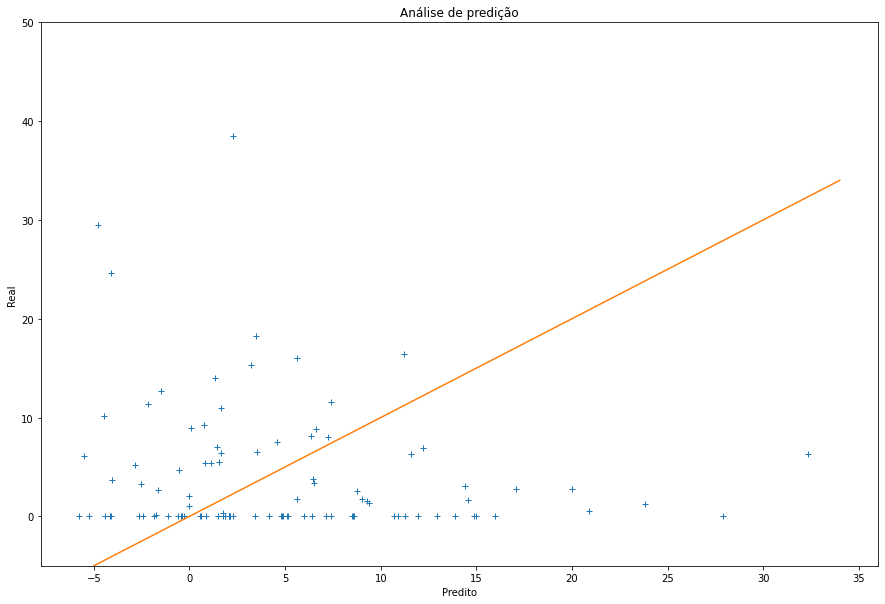

In [290]:
plt.subplots(figsize=(15,10))
plt.plot(y_pred, y_test, '+')
plt.plot(range(-5,35), range(-5,35), label='esperado')
plt.xlabel('Predito')
plt.ylabel('Real')
plt.ylim(-5, 50)
plt.title('Análise de predição')
plt.show()

Foram testadas diversas combinações de redes neurais. Apenas a relu aparentou, no processo de treino, resultados favoraveis. O uso de batch_size=1 tambem achei ser melhor, devido a baixa quantidade de dados. A predição ainda assim não foi favoravel, acredito que devido a baixa quantidade de dados. 